In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../Data/daily_data.csv")
data_droped = data.loc[~data["water_level"].isna(),]
water_level = data_droped[["datetime","water_level"]]

In [3]:
water_level.set_index("datetime", inplace=True)

In [15]:
data_droped[["water_level"]].isna().nunique()

water_level    1
dtype: int64

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(water_level, model='additive', period=2)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)


datetime
2012-01-01 00:00:00+01:00           NaN
2012-01-02 00:00:00+01:00    405.915680
2012-01-03 00:00:00+01:00    405.921840
2012-01-04 00:00:00+01:00    405.925486
2012-01-05 00:00:00+01:00    405.931615
                                ...    
2019-11-23 00:00:00+01:00    405.949948
2019-11-24 00:00:00+01:00    405.943628
2019-11-25 00:00:00+01:00    405.944045
2019-11-26 00:00:00+01:00    405.948316
2019-11-27 00:00:00+01:00           NaN
Name: trend, Length: 2631, dtype: float64
datetime
2012-01-01 00:00:00+01:00   -0.000101
2012-01-02 00:00:00+01:00    0.000101
2012-01-03 00:00:00+01:00   -0.000101
2012-01-04 00:00:00+01:00    0.000101
2012-01-05 00:00:00+01:00   -0.000101
                               ...   
2019-11-23 00:00:00+01:00   -0.000101
2019-11-24 00:00:00+01:00    0.000101
2019-11-25 00:00:00+01:00   -0.000101
2019-11-26 00:00:00+01:00    0.000101
2019-11-27 00:00:00+01:00   -0.000101
Name: seasonal, Length: 2631, dtype: float64
datetime
2012-01-01 00:00:00+01:00   

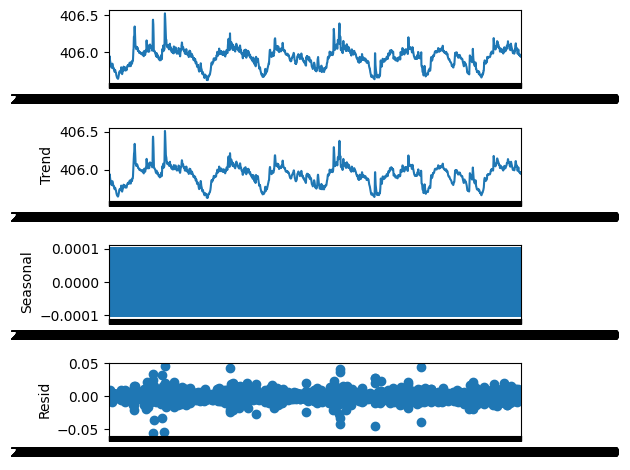

In [5]:

from matplotlib import pyplot
result.plot()
pyplot.show()

In [26]:
result = seasonal_decompose(data_droped["water_level"], model='multiplicative', period=1)
result.plot()
pyplot.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None